In [1]:
import tqdm
import subprocess

# install google chrome and chromedriver
commands = [
    "wget https://dl.google.com/linux/linux_signing_key.pub",
    "sudo apt-key add linux_signing_key.pub",
    "echo 'deb [arch=amd64] http://dl.google.com/linux/chrome/deb/ stable main' >> /etc/apt/sources.list.d/google-chrome.list",
    "sudo apt-get -y update",
    "sudo apt-get install -y google-chrome-stable",
    "wget -O /tmp/chromedriver.zip http://chromedriver.storage.googleapis.com/`curl -sS chromedriver.storage.googleapis.com/LATEST_RELEASE`/chromedriver_linux64.zip",
    "unzip /tmp/chromedriver.zip chromedriver -d /usr/local/bin/",
    "pip install selenium",
    "pip install facenet_pytorch",
    "pip install tfjs-graph-converter"
]

for command in tqdm.tqdm(commands):
    # run the command and capture the output
    output = subprocess.run(command, shell=True, capture_output=True)
    # print the output using tqdm.write
    #tqdm.tqdm.write(output.stdout.decode())


100%|██████████| 10/10 [00:37<00:00,  3.75s/it]


In [154]:
# import libraries
import time
from PIL import Image
from selenium import webdriver
from selenium.webdriver.common.by import By

In [155]:
url = 'https://www.nike.sa/en/mens/shoes#DM1120' ## Enter your link

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--headless')
chrome_options.add_argument('--disable-gpu')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument("--window-size=1920,1080")

driver = webdriver.Chrome(options=chrome_options)

# Print them for reference

driver.get(url)
driver.implicitly_wait(10)

In [176]:
# Get the initial height of the page
#last_height = driver.execute_script("return document.body.scrollHeight")

# Loop until the end of the page is reached
for i in range(100):
    # Scroll down to the bottom of the page
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Wait for the new content to load
    driver.implicitly_wait(2)

In [177]:
import bs4

In [178]:
all_shoes = driver.find_elements(By.XPATH, "//div[@class='b-product-grid__item js-tile-item ']")

In [179]:
print(len(all_shoes))

397


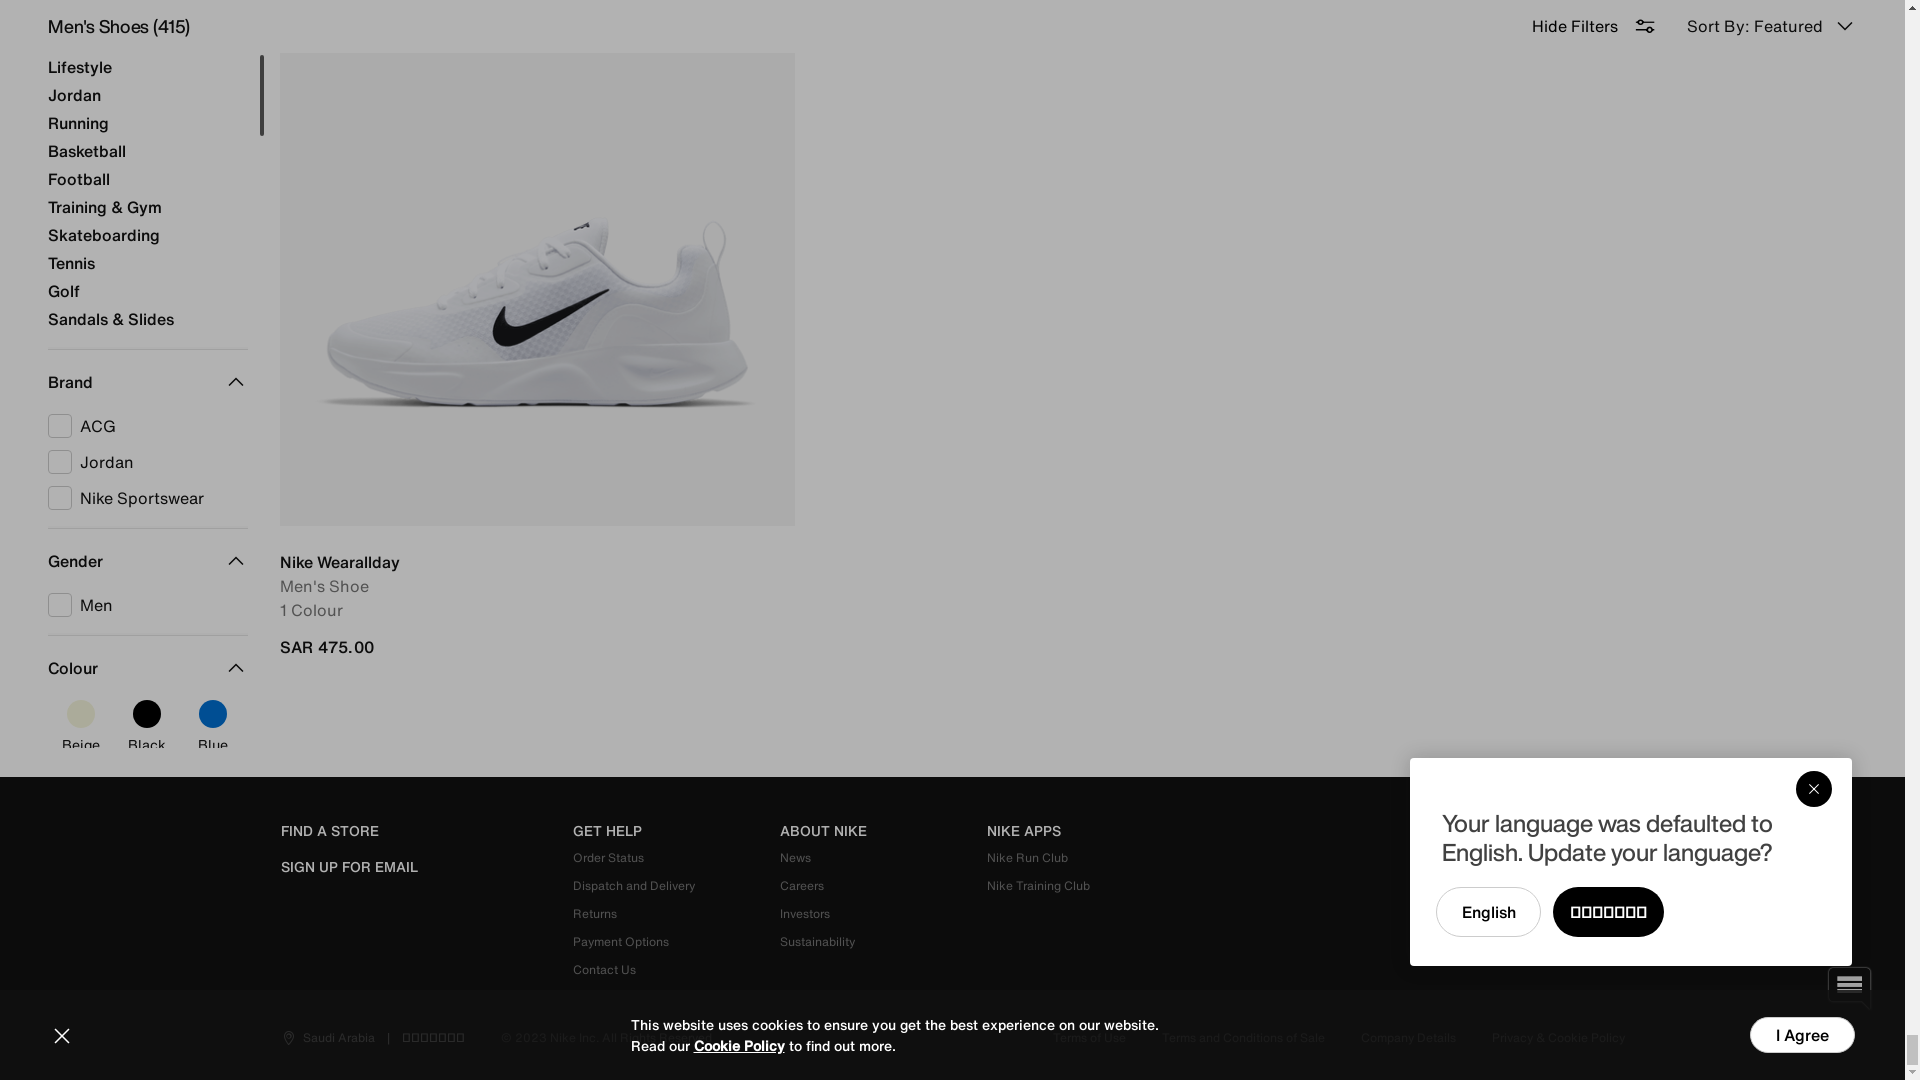

In [180]:
# take a picture
driver.save_screenshot('result160.png')
img = Image.open('result160.png')
img

In [181]:
page_content = driver.page_source
soup = bs4.BeautifulSoup(page_content, 'html.parser')

### Extracting all shoes using bs4

In [182]:
shoes = soup.find_all("div", class_="b-product-grid__item js-tile-item")

In [183]:
print([1,3] != [])

True


In [188]:
product_name = list()
product_category = list()
price = list()
product_images = list()
product_description = list()
product_benefits = list()
product_details = list()
productdata_content = list()
other_colors = list()

In [189]:
soup_product = ''

for shoe in shoes:
  inner_colors = list()
  inner_images = list()

  colors = shoe.find_all("img", class_="b-product-tile__swatch-image")
  if shoe != []:
    for img in colors:
      inner_colors.append(img['src'])
  else:
    other_colors.append(None)

  other_colors.append(inner_colors)

  shoe_link = shoe.find("a", class_="b-product-tile__image-link js-product-link")['href']
  url = f'https://www.nike.sa{shoe_link}'

  # Driver & Get page source
  driver_product = webdriver.Chrome(options=chrome_options)
  # Print them for reference

  driver_product.get(url)
  driver_product.implicitly_wait(10)

  product_page_content = driver_product.page_source

  soup_product = bs4.BeautifulSoup(product_page_content, 'html.parser')

  ## Extraxt Information
  product_name.append(soup_product.find("span", class_="b-pdp__product-name").text)
  product_category.append(soup_product.find("span", class_="b-pdp__product-subcategory js-pdp__product-subcategory").text)
  price.append(soup_product.find("span", class_="price__regular").text)

  images = soup_product.find_all("img", class_="b-picture__img b-pdpimages__carousel-img js-zoomed-img js-lazy entered loaded")
  for img in images:
    inner_images.append(img['src'])

  product_images.append(inner_images)
  product_description.append(soup_product.find("div", class_="b-fullpdpdetails__item").text)
  product_benefits.append(soup_product.find_all("div", class_="b-productdata__content")[0].text)

  try:
    product_details.append(soup_product.find_all("div", class_="b-productdata__content")[1].text)

  except IndexError:
    product_details.append(None)


  try:
    productdata_content.append(soup_product.find_all("div", class_="b-productdata__content")[2].text)

  except IndexError:
    productdata_content.append(None)




In [240]:
data = dict()
data['product_name'] = product_name
data['product_category'] = product_category
data['price'] = price
data['product_images'] = product_images
data['product_description'] = product_description
data['product_benefits'] = product_benefits
data['product_details'] = product_details
data['productdata_content'] = productdata_content
data['other_colors'] = other_colors

In [241]:
import pandas as pd

df = pd.DataFrame(data)
df.head()

,product_name,product_category,price,product_images,product_description,product_benefits,product_details,productdata_content,other_colors
0,\nNike Air Max 1\n,\nMen's Slides\n,\n\n\nSAR 500.00\n\n\n,[https://www.nike.sa/dw/image/v2/BDVB_PRD/on/d...,\nThe Nike Air Max 1 Slides re-imagine the leg...,\n\nMaterials and colours celebrate the origin...,\n\nColour Shown: White/Black/Light Neutral Gr...,\nRevolutionary Nike Air technology first made...,[]
1,\nNike Air Max Plus Mercurial 25\n,\nMen's Shoes\n,"\n\n\nSAR 1,200.00\n\n\n",[https://www.nike.sa/dw/image/v2/BDVB_PRD/on/d...,\nWhat's better than celebrating 1 birthday? C...,"\n\nAiry mesh, synthetic leather and knit text...",\n\nFoam in midsole\nReflective design details...,"\nFrom your local pitch to the global stage, y...",[]
2,\nNike ACG Lowcate\n,\nMen's Shoes\n,\n\n\nSAR 549.00\n\n\n,[https://www.nike.sa/dw/image/v2/BDVB_PRD/on/d...,"\nFrom streets to parks to trails, you can bui...",\n\nMidfoot webbing locks in the fit.\nA pull ...,\n\nColour Shown: Black/Black/White/White\nSty...,\nMixed material upper delivers a classic outd...,[https://www.nike.sa/dw/image/v2/BDVB_PRD/on/d...
3,\nNike Dunk Low\n,\nMen's Shoes\n,\n\n\nSAR 750.00\n\n\n,[https://www.nike.sa/dw/image/v2/BDVB_PRD/on/d...,\nGround your look in throwback hoops flair wi...,\n\nUpper ages to soft perfection and features...,\n\nPerforations on the toe\nVariable-width la...,"\nFrom backboards to skateboards, the influenc...",[]
4,\nJordan Play\n,\nMen's Slides\n,\n\n\nSAR 275.00\n\n\n,[https://www.nike.sa/dw/image/v2/BDVB_PRD/on/d...,\nGet all of the underfoot support you need wi...,\n\nSynthetic leather and foam feel soft again...,\n\nSoft contoured footbed\nColour Shown: Blac...,None,[https://www.nike.sa/dw/image/v2/BDVB_PRD/on/d...


# Note
If a certain row contains None, that means that this product doesn't have this attribute

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_name         397 non-null    object
 1   product_category     397 non-null    object
 2   price                397 non-null    object
 3   product_images       397 non-null    object
 4   product_description  397 non-null    object
 5   product_benefits     397 non-null    object
 6   product_details      395 non-null    object
 7   productdata_content  294 non-null    object
 8   other_colors         397 non-null    object
dtypes: object(9)
memory usage: 28.0+ KB


# Data Cleaning & Preprocessing

In [243]:
df['product_benefits'].iloc[5].split("\n")

['',
 '',
 'Lacing directly through the medial and lateral webbing loops adds forefoot support.',
 'Visible breathability in the lightweight upper provides a comfortable fit.',
 'Stiff clip around the heel helps lock your foot in over the cushioning.',
 'React foam in the insole adds responsive comfort.',
 'Moulded tongue extends to the toe area and expands for comfort.',
 'Plush interior makes it ideal for players who want to feel quick without sacrificing comfort or control.',
 '',
 '']

In [249]:
def remove_empty_strings(my_list):
  try:
    my_list = my_list.split("\n")
    my_list = [x for x in my_list if x != '']
    return my_list
  except AttributeError:
    return my_list



df['product_benefits'] = df['product_benefits'].apply(remove_empty_strings)
df['product_details'] = df['product_details'].apply(remove_empty_strings)


In [250]:
df['price'].iloc[3]

'SAR 750.00'

In [251]:
df['price'] = df['price'].apply(lambda x: x.replace("\n", ""))

In [252]:
df['product_name'] = df['product_name'].apply(lambda x: x.replace("\n", ""))

In [253]:
df['product_description'].iloc[3]


"\nGround your look in throwback hoops flair with the Nike Dunk Low. Created for the hardwood but taken to the streets, this '80s basketball icon returns with soft suede, leather overlays and an earthy neutral colourway. Channelling vintage style, its padded and low-cut collar lets you comfortably take your game anywhere.\n"

In [254]:
df['productdata_content'].iloc[8]


'\nA GORE-TEX finish on the upper is designed to help keep weather at bay so you can stay focused on the adventure.\n'

In [255]:
def replace_newline(x):
  try:
    return x.replace("\n", "")
  except AttributeError:
    return x

df['product_description'] = df['product_description'].apply(replace_newline)
df['productdata_content'] = df['productdata_content'].apply(replace_newline)
df['product_category'] = df['product_category'].apply(replace_newline)
#df['product_details'] = df['product_details'].apply(replace_newline)

In [256]:
print(df['product_details'].iloc[5])

['Colour Shown: Black/Phantom/Pure Platinum/Cone', 'Style: DJ6015-004']


## Data After Cleaning

In [257]:
df.sample(10)

,product_name,product_category,price,product_images,product_description,product_benefits,product_details,productdata_content,other_colors
333,Nike Court Vision Mid Next Nature,Men's Shoes,SAR 500.00,[https://www.nike.sa/dw/image/v2/BDVB_PRD/on/d...,In love with the classic look of '80s basketba...,[Made from at least 20% recycled material by w...,"[Colour Shown: Light Smoke Grey/Sail/Black, St...",None,[https://www.nike.sa/dw/image/v2/BDVB_PRD/on/d...
50,Nike Air Dunk Jumbo,Men's Shoes,SAR 800.00,[https://www.nike.sa/dw/image/v2/BDVB_PRD/on/d...,Your favourite look goes big and bold. Extra-l...,[Leather and mesh on the upper provide a premi...,"[2 sets of laces, Padded collar, Exposed foam ...","From backboards to skateboards, the influence ...",[]
177,Nike Zoom Mercurial Dream Speed Vapor 15 Elite FG,Firm-Ground Football Boot,"SAR 1,600.00",[https://www.nike.sa/dw/image/v2/BDVB_PRD/on/d...,Cristiano Ronaldo couldn't chase his dream alo...,"[For use on slightly wet, short-grass pitches,...","[Flowers are a symbol of where it all started,...",The 3/4-length Zoom Air unit sits in the plate...,[]
341,Jordan Stay Loyal 2,Men's Shoes,SAR 750.00,[https://www.nike.sa/dw/image/v2/BDVB_PRD/on/d...,"Inspired by generations of Js, these kicks are...",[Nike Air technology absorbs impact for cushio...,"[Jumpman logo heel band, Heel loop, Moulded ey...",None,[https://www.nike.sa/dw/image/v2/BDVB_PRD/on/d...
329,NikeCourt Zoom Lite 3,Men's Hard Court Tennis Shoes,SAR 239.00,[https://www.nike.sa/dw/image/v2/BDVB_PRD/on/d...,"At first glance, the NikeCourt Zoom Lite 3 loo...","[Smooth leather is flexible and durable., Zoom...","[Designed for hard court surfaces, Padded coll...",None,[https://www.nike.sa/dw/image/v2/BDVB_PRD/on/d...
331,ACG Air Deschutz+,Sandals,SAR 500.00,[https://www.nike.sa/dw/image/v2/BDVB_PRD/on/d...,From city hikes to canyon trails and long walk...,[This product was designed and tested in Orego...,[Nike Air unit in the heel gives you cushionin...,Whether you're splashing in streams or hopping...,[]
258,Nike Dunk Low Retro,Men's Shoe,SAR 499.00,[https://www.nike.sa/dw/image/v2/BDVB_PRD/on/d...,Created for the hardwood but taken to the stre...,[Premium leather in the upper has the perfect ...,"[Low-cut collar, Foam insole, Perforations on ...",None,[]
308,Nike Air Max 90 G NRG,Golf Shoes,SAR 749.00,[https://www.nike.sa/dw/image/v2/BDVB_PRD/on/d...,Step into the 1st tee box with the timeless fl...,[The traction pattern gives you optimal grip i...,"[Fused overlays, extra eyestays and strategica...",A foam midsole with Max Air unit in the heel c...,[]
241,Nike Winflo 9,Men's Road Running Shoes,SAR 299.00,[https://www.nike.sa/dw/image/v2/BDVB_PRD/on/d...,The Winflo 9 gives you the support you need to...,[The upper uses translucent mesh for breathabl...,"[Soft foam has been updated from the Winflo 8,...",A rubber outsole with a Waffle-inspired patter...,[]
283,Nike Zoom Mercurial Vapor 15 Academy XXV TF,Turf Football Shoes,SAR 500.00,[https://www.nike.sa/dw/image/v2/BDVB_PRD/on/d...,Celebrate the 25th anniversary of 1 of our fas...,[The speed cage inside the structure is made f...,"[For use on shorter, synthetic surfaces, Cushi...","Throughout the years, Volt and Hyper Pink have...",[]


In [258]:
df.to_csv("Nike_Men_shoes.csv", encoding = "UTF-8")